<a href="https://colab.research.google.com/github/makifnawab/assignment-linear-regression/blob/main/linear_regression_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluation Metrics and Regression Implementation

**1. Visualize Distribution of Residuals (Seaborn Diamonds Dataset)**

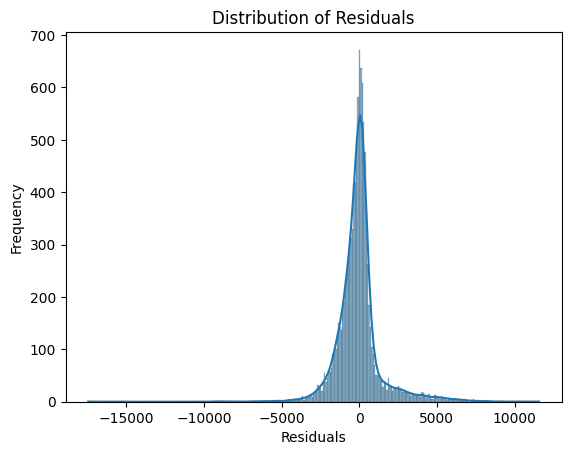

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

diamonds = sns.load_dataset('diamonds')

features = ['carat', 'depth', 'table', 'x', 'y', 'z']
target = 'price'

X_train, X_test, y_train, y_test = train_test_split(
    diamonds[features], diamonds[target], test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

residuals = y_test - predictions

sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [4]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**2. Calculate MSE, MAE, RMSE**

In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MSE: 2242178.9040856035
MAE: 888.4808633901026
RMSE: 1497.3906985438382


**3. Check Linear Regression Assumptions**

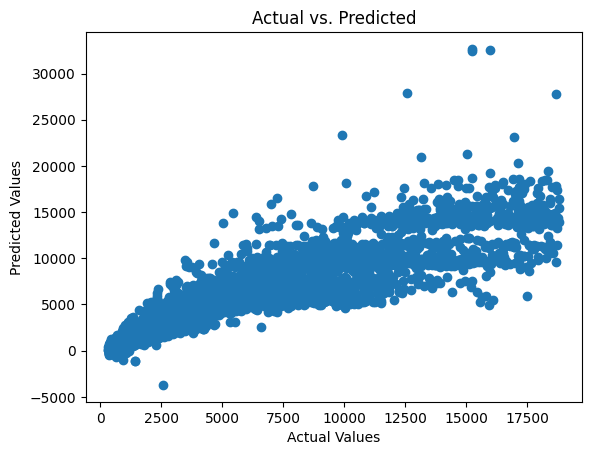

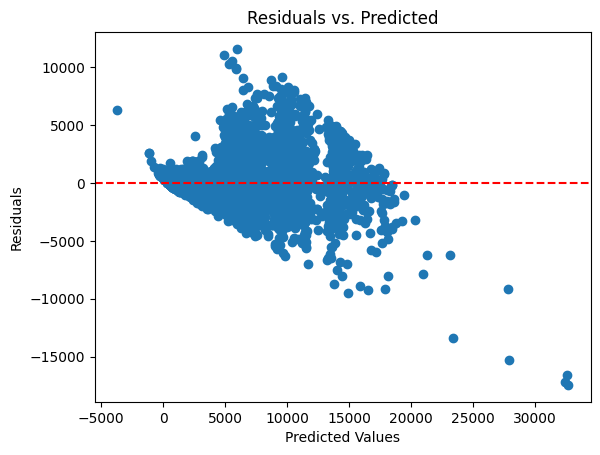

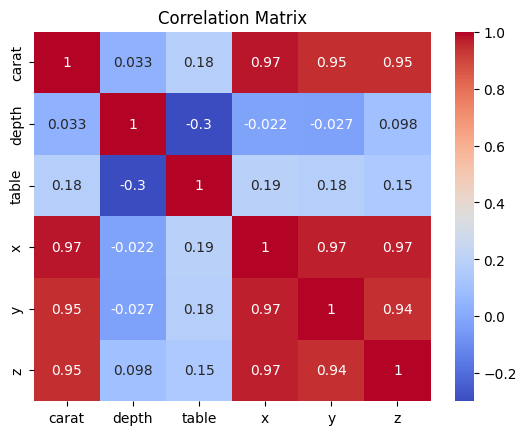

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted')
plt.show()

plt.scatter(predictions, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted')
plt.show()

correlation_matrix = pd.DataFrame(X_train).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**4. Machine Learning Pipeline with Feature Scaling**

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import r2_score


pipeline_lr = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])
pipeline_ridge = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())])
pipeline_lasso = Pipeline([('scaler', StandardScaler()), ('lasso', Lasso())])

pipelines = [pipeline_lr, pipeline_ridge, pipeline_lasso]
pipeline_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']

for pipeline, name in zip(pipelines, pipeline_names):
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    r2 = r2_score(y_test, predictions)
    print(f'{name} R-squared: {r2}')


Linear Regression R-squared: 0.8589542625888938
Ridge Regression R-squared: 0.858953546861451
Lasso Regression R-squared: 0.8589202727933851


**5. Simple Linear Regression with Coefficients, Intercept, R-squared**

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(f'Coefficient: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'R-squared: {r2_score(y_test, predictions)}')

Coefficient: [10683.18425966  -204.09955335  -104.26736872 -1286.79957429
    37.63252069    53.39486424]
Intercept: 20976.563736037213
R-squared: 0.8589542625888938


**6. Analyze Total Bill and Tip (Tips Dataset)**

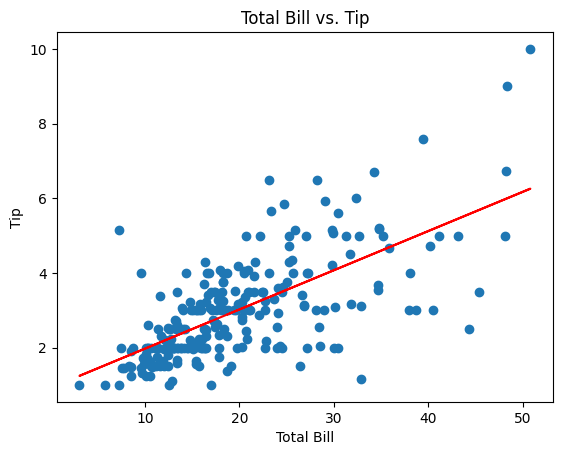

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

tips = sns.load_dataset('tips')

X = tips[['total_bill']]
y = tips['tip']

model = LinearRegression()
model.fit(X, y)

plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Total Bill vs. Tip')
plt.show()

**7. Linear Regression on Synthetic Data**

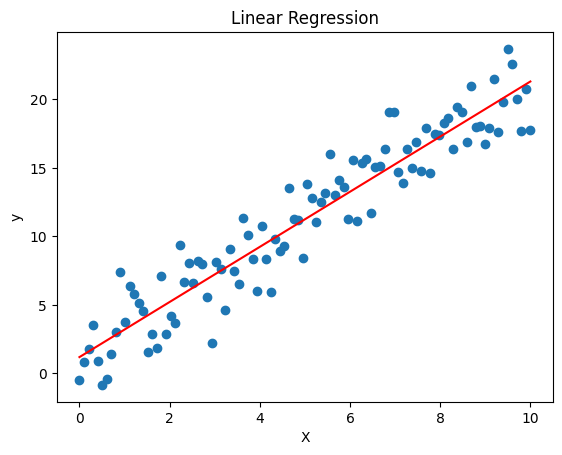

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X + 1 + np.random.randn(100, 1) * 2

model = LinearRegression()
model.fit(X, y)

plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

**8. Pickle a Trained Model**

In [10]:
import pickle


with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)



**9. Polynomial Regression (Degree 2)**

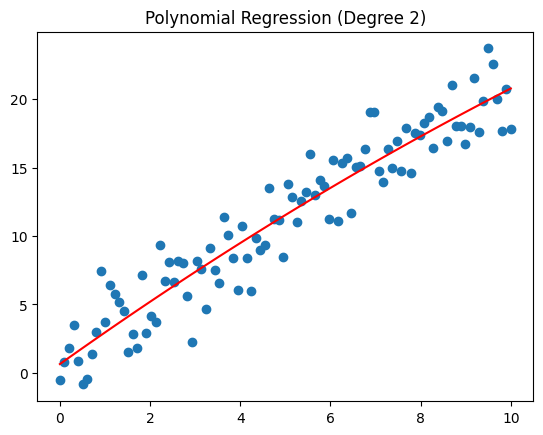

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

plt.scatter(X, y)
plt.plot(X, model.predict(X_poly), color='red')
plt.title('Polynomial Regression (Degree 2)')
plt.show()

**10. Synthetic Data for Simple Linear Regression**

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.random.rand(100, 1) * 10
y = 3 * X + 2 + np.random.randn(100, 1) * 1.5

model = LinearRegression()
model.fit(X, y)

print(f'Coefficient: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Coefficient: [[3.06989974]]
Intercept: [1.71542314]


**11. Compare Polynomial Regression Degrees**

In [13]:
from sklearn.metrics import r2_score

degrees = [1, 2, 3, 4, 5]
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    predictions = model.predict(X_poly)
    r2 = r2_score(y, predictions)
    print(f'Degree {degree} R-squared: {r2}')

Degree 1 R-squared: 0.9711675840396533
Degree 2 R-squared: 0.9720107824783292
Degree 3 R-squared: 0.97209472224005
Degree 4 R-squared: 0.9720978724725041
Degree 5 R-squared: 0.9721071330635158


**12. Simple Linear Regression with Two Features**

In [14]:
X = np.random.rand(100, 2) * 10
y = 2 * X[:, 0] + 3 * X[:, 1] + 1 + np.random.randn(100) * 2

model = LinearRegression()
model.fit(X, y)

print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'R-squared: {model.score(X, y)}')

Coefficients: [1.97003346 3.1036132 ]
Intercept: 0.641661816332423
R-squared: 0.9543754921235358


**13. Generate Synthetic Data and Visualize Regression**

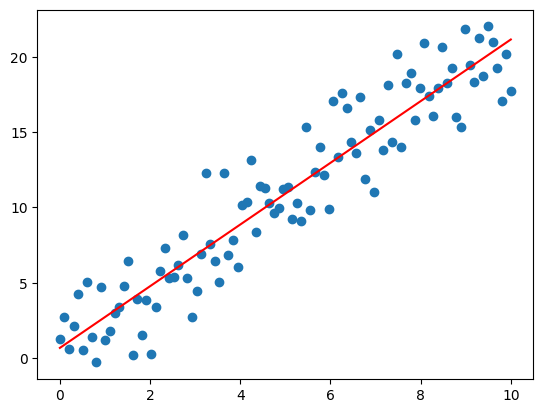

In [15]:
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X + 1 + np.random.randn(100, 1) * 2

model = LinearRegression()
model.fit(X, y)

plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.show()

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import joblib

**# 14. Variance Inflation Factor (VIF)**

In [17]:
def calculate_vif(dataframe, features):
    """Calculates VIF for each feature in a DataFrame."""
    vif_data = pd.DataFrame()
    vif_data["feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(dataframe[features].values, i) for i in range(len(features))]
    return vif_data

In [18]:
# Example usage:
X = np.random.rand(100, 3)
df = pd.DataFrame(X, columns=['feature1', 'feature2', 'feature3'])
vif_result = calculate_vif(df, ['feature1', 'feature2', 'feature3'])
print("VIF Results:\n", vif_result)

VIF Results:
     feature       VIF
0  feature1  3.080900
1  feature2  2.962695
2  feature3  3.059311


**# 15. Polynomial Regression (Degree 4)**

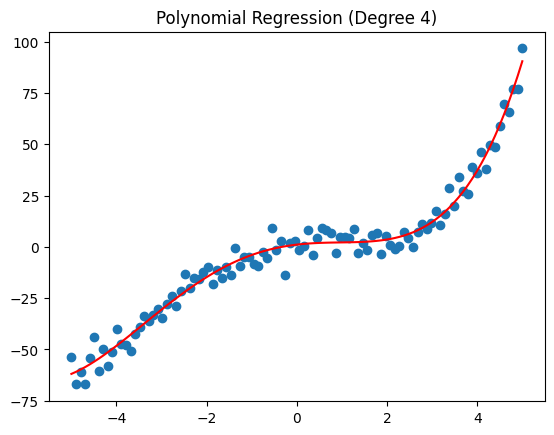

In [19]:
X = np.linspace(-5, 5, 100).reshape(-1, 1)
y = 0.1 * X**4 + 0.5 * X**3 - 2 * X**2 + 3 * X + 1 + np.random.randn(100, 1) * 5
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
plt.scatter(X, y)
plt.plot(X, model.predict(X_poly), color='red')
plt.title('Polynomial Regression (Degree 4)')
plt.show()


**# 16. Machine Learning Pipeline with Standardization**

In [20]:
X = np.random.rand(100, 4)
y = 2 * X[:, 0] + 3 * X[:, 1] - X[:, 2] + 4 * X[:, 3] + np.random.randn(100) * 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

R-squared: 0.2507116489896889


**# 17. Polynomial Regression (Degree 3)**

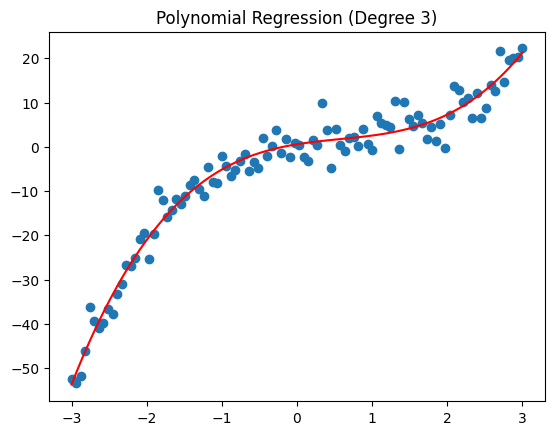

In [21]:
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = X**3 - 2 * X**2 + 3 * X + 1 + np.random.randn(100, 1) * 3
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
plt.scatter(X, y)
plt.plot(X, model.predict(X_poly), color='red')
plt.title('Polynomial Regression (Degree 3)')
plt.show()

**# 18. Multiple Linear Regression (5 Features)**

In [22]:
X = np.random.rand(100, 5)
y = 2 * X[:, 0] + 3 * X[:, 1] - X[:, 2] + 4 * X[:, 3] - 2 * X[:, 4] + np.random.randn(100) * 2
model = LinearRegression()
model.fit(X, y)
print(f'R-squared: {model.score(X, y)}')
print(f'Coefficients: {model.coef_}')


R-squared: 0.5026592522463665
Coefficients: [ 2.8256735   4.09159806 -0.35043714  4.06603676 -0.93214337]


**# 19. Generate Synthetic Data and Visualize Regression**

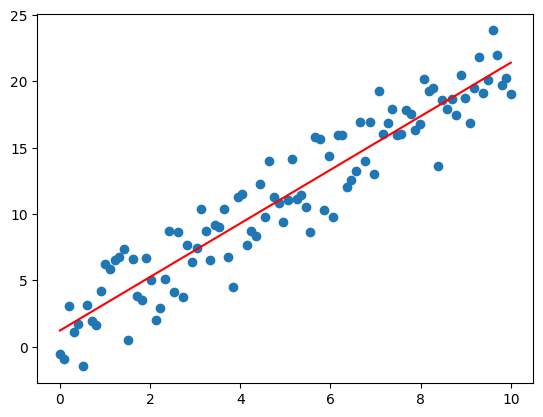

In [23]:
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X + 1 + np.random.randn(100, 1) * 2
model = LinearRegression()
model.fit(X, y)
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.show()

**# 20. Synthetic Data (3 Features)**

In [24]:
X = np.random.rand(100, 3)
y = 2 * X[:, 0] + 3 * X[:, 1] - X[:, 2] + np.random.randn(100) * 2
model = LinearRegression()
model.fit(X, y)
print(f'R-squared: {model.score(X, y)}')
print(f'Coefficients: {model.coef_}')


R-squared: 0.2099021673653918
Coefficients: [ 0.6856419   2.45204634 -2.81738983]


**# 21. Serialize and Deserialize with Joblib**

In [30]:

model = LinearRegression()
model.fit(X_train, y_train)
joblib.dump(model, 'linear_regression_model.joblib')
loaded_model = joblib.load('linear_regression_model.joblib')
print("joblib model loaded")

joblib model loaded


**# 22. Linear Regression with Categorical Features (One-Hot Encoding)**

In [26]:
tips = sns.load_dataset('tips')
X = tips[['sex', 'smoker', 'day', 'time', 'total_bill']]
y = tips['tip']
X = pd.get_dummies(X, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)
model = LinearRegression()
model.fit(X, y)
print("categorical linear regression done")


categorical linear regression done


**# 23. Compare Ridge and Linear Regression**

In [27]:
X = np.random.rand(100, 2)
y = 2 * X[:, 0] + 3 * X[:, 1] + np.random.randn(100) * 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
print(f'Linear Regression Coefficients: {linear_model.coef_}')
print(f'Ridge Regression Coefficients: {ridge_model.coef_}')
print(f'Linear Regression R-squared: {linear_model.score(X_test, y_test)}')
print(f'Ridge Regression R-squared: {ridge_model.score(X_test, y_test)}')


Linear Regression Coefficients: [2.06375381 3.39586805]
Ridge Regression Coefficients: [1.86325855 3.03782954]
Linear Regression R-squared: 0.18879159541827584
Ridge Regression R-squared: 0.22644943493181635


**# 24. Cross-Validation for Linear Regression**

In [28]:
X = np.random.rand(100, 2)
y = 2 * X[:, 0] + 3 * X[:, 1] + np.random.randn(100) * 2
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f'Cross-Validation R-squared Scores: {scores}')
print(f'Mean R-squared: {scores.mean()}')


Cross-Validation R-squared Scores: [ 0.14413757 -0.00968113  0.0764469   0.12054575  0.29717287]
Mean R-squared: 0.1257243936698607


**# 25. Compare Polynomial Regression Degrees (Cross Validation)**

In [29]:
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = X**3 - 2 * X**2 + 3 * X + 1 + np.random.randn(100, 1) * 3
degrees = [1, 2, 3, 4, 5]
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    scores = cross_val_score(model, X_poly, y, cv=5, scoring='r2')
    print(f'Degree {degree} Mean R-squared: {scores.mean()}')

Degree 1 Mean R-squared: -3.1856162662088607
Degree 2 Mean R-squared: -5.637073121135748
Degree 3 Mean R-squared: 0.3830429811848915
Degree 4 Mean R-squared: 0.3663496110634203
Degree 5 Mean R-squared: -0.8528177740286239
